In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split 

from sklearn import metrics 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('customer.csv')
data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


# CHECKING BALANCED OR NOT

In [3]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [4]:
((39922)/(39922+5289))*100

88.30151954170445

In [5]:
((5289)/(39922+5289))*100

11.698480458295547

The dataset is imbalanced

# DATA PREPROCESSING

In [6]:
data.shape

(45211, 11)

# CLEAN THE DATA

To clean the data i'm going to do 4 steps:

    1.Missing values(data) and checking duplicate data
    2.Spelling correction
    3.Data format check (datatype)
    4.Outlier check

# First step is to check is there any missing value(data) & Duplicates data

In [7]:
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

There are no null values in any columns.

In [8]:
data.duplicated().sum()

6

In [9]:
data=data.drop_duplicates()
data.duplicated().sum()

0

# Second step is to check is data in right format

In [10]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

# Third step is to check is there any spelling mistakes in object datas:

In [11]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [12]:
print(data['job'].unique())
print(data['marital'].unique())
print(data['education_qual'].unique())
print(data['call_type'].unique())
print(data['mon'].unique())
print(data['y'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['no' 'yes']


# Fourth step is there any outliers in the given data

In [13]:
data.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


In [14]:
# Checking age column
iqr = data['age'].quantile(0.75) - data['age'].quantile(0.25)
upper_threshold = data['age'].quantile(0.75) + (1.5 * iqr)
lower_threshold = data['age'].quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(70.5, 10.5)

In [15]:
# Checking day column
iqr = data['day'].quantile(0.75) - data['day'].quantile(0.25)
upper_threshold = data['day'].quantile(0.75) + (1.5 * iqr)
lower_threshold = data['day'].quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(40.5, -11.5)

In [16]:
# Checking duration column
iqr = data['dur'].quantile(0.75) - data['dur'].quantile(0.25)
upper_threshold = data['dur'].quantile(0.75) + (1.5 * iqr)
lower_threshold = data['dur'].quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold


(643.0, -221.0)

In [17]:
data.dur = data.dur.clip(-221,643)

In [18]:
# Checking num_calls column
iqr = data['num_calls'].quantile(0.75) - data['num_calls'].quantile(0.25)
upper_threshold = data['num_calls'].quantile(0.75) + (1.5 * iqr)
lower_threshold = data['num_calls'].quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(6.0, -2.0)

In [19]:
data.num_calls = data.num_calls.clip(-2,6)

# EDA

## Univariant Analysis

## DISTRIBUTION OF FEATURES

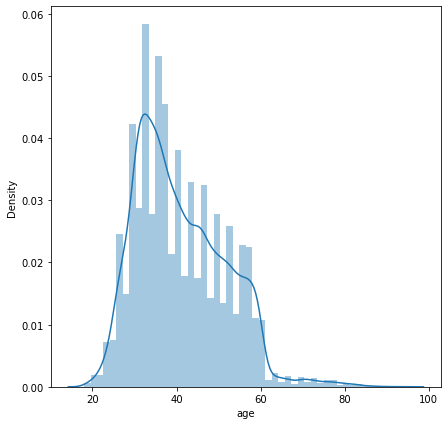

In [20]:
# Distribution of age column
plt.figure(figsize=(7,7))
sns.distplot(data.age)
plt.show()

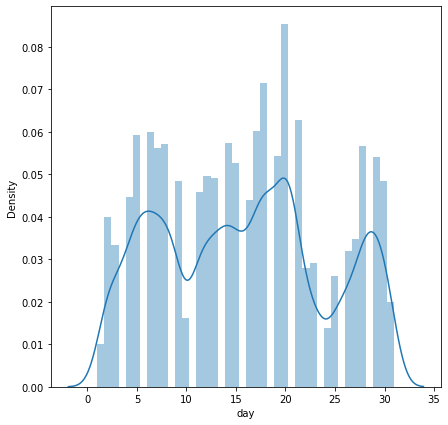

In [21]:
# Distribution of day column
plt.figure(figsize=(7,7))
sns.distplot(data.day)
plt.show()

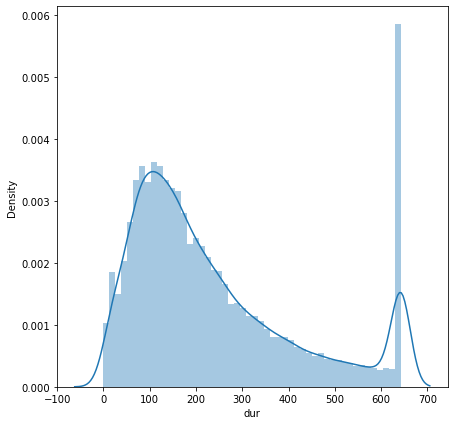

In [22]:
# Distribution of duration column
plt.figure(figsize=(7,7))
sns.distplot(data.dur)
plt.show()

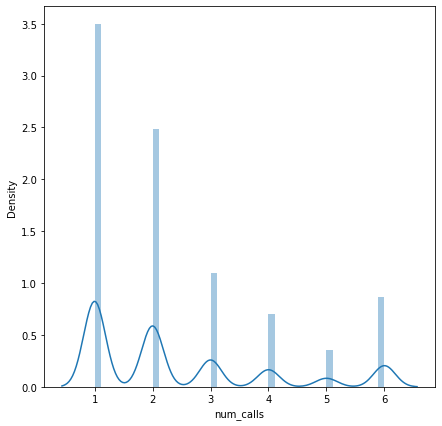

In [23]:
# Distribution of num_calls column
plt.figure(figsize=(7,7))
sns.distplot(data.num_calls)
plt.show()

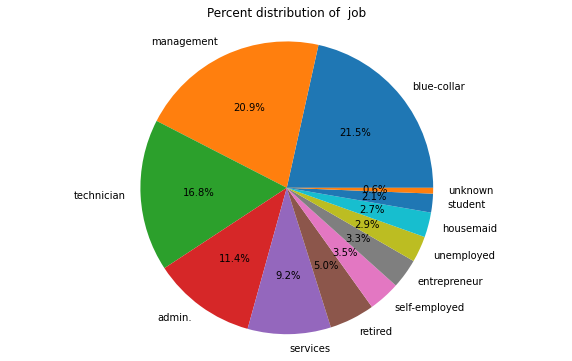

In [24]:
# Distribution of job column
plt.figure(figsize=(10,6))
df_source = data.job.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['job'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  job')
plt.axis('equal')
plt.show()

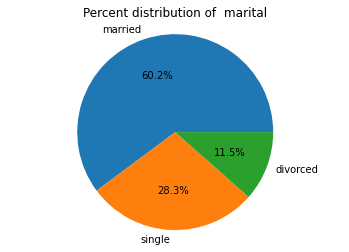

In [25]:
# Distribution of Marital column
df_source = data.marital.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['marital'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  marital')
plt.axis('equal')
plt.show()

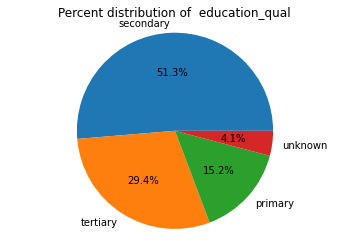

In [26]:
# Distribution of Educational column
df_source = data.education_qual.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['education_qual'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  education_qual')
plt.axis('equal')
plt.show()

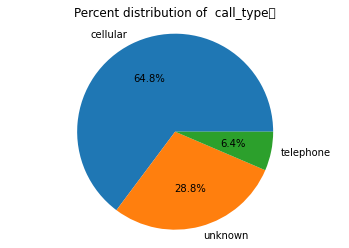

In [27]:
# Distribution of call_type column
df_source = data.call_type	.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['call_type'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  call_type	')
plt.axis('equal')
plt.show()

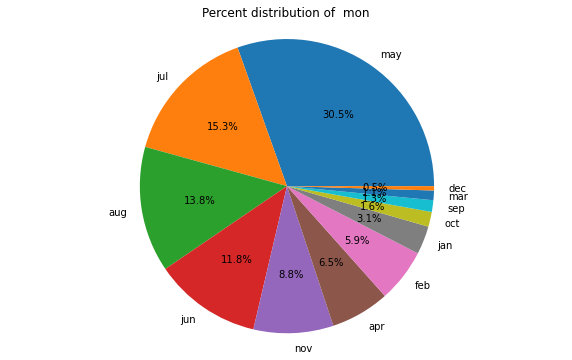

In [28]:
# Distribution of month column
plt.figure(figsize=(10,6))
df_source = data.mon.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['mon'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  mon')
plt.axis('equal')
plt.show()

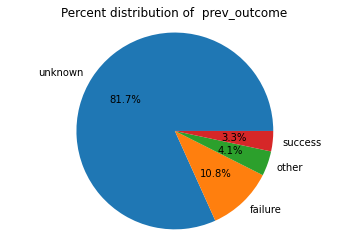

In [29]:
# Distribution of prev_outcome column
df_source = data.prev_outcome.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['prev_outcome'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  prev_outcome')
plt.axis('equal')
plt.show()

In [30]:
data['y']=data['y'].map({'yes':1,'no':0})

## FEATURES VS TARGET

## Bivariant Analysis

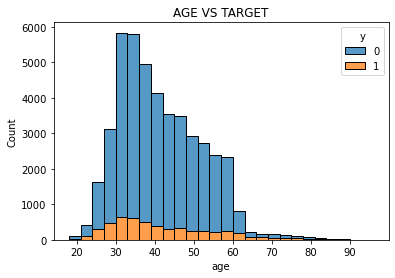

In [31]:
# Age vs Target
sns.histplot(data=data, x="age", hue="y", multiple="stack",binwidth=3)
plt.title('AGE VS TARGET')
plt.show()

Middle Age peoples insured more than the young and aged ones.

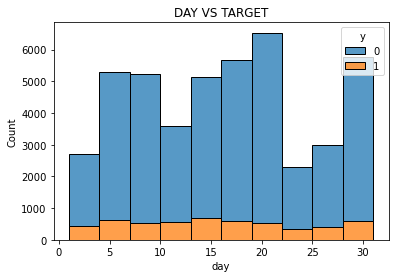

In [32]:
# Day vs Target
sns.histplot(data=data, x="day", hue="y", multiple="stack",binwidth=3)
plt.title('DAY VS TARGET')
plt.show()

Day may not a reason for subscribtion. Etheir we can drop or not. It's upto we to decide.

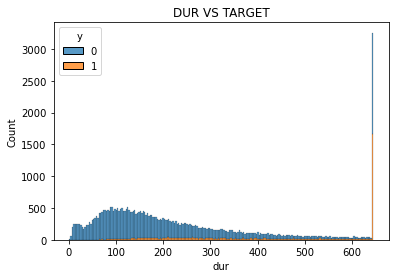

In [33]:
# Duration vs Target
sns.histplot(data=data, x="dur", hue="y", multiple="stack",binwidth=3)
plt.title('DUR VS TARGET')
plt.show()

Duration of the call plays a major role in subcription.

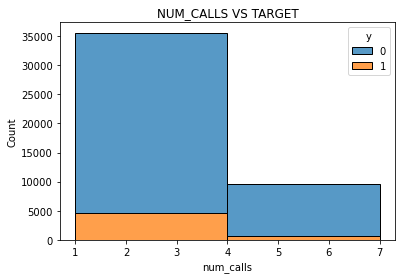

In [34]:
# Num_calls vs Target
sns.histplot(data=data, x="num_calls", hue="y", multiple="stack",binwidth=3)
plt.title('NUM_CALLS VS TARGET')
plt.show()

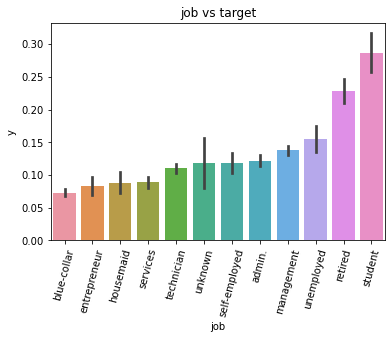

In [35]:
# Job vs Target
sns.barplot(x='job',y='y',data=data,order=data.groupby('job')['y'].mean().reset_index().sort_values('y')['job'])
plt.xticks(rotation=75)
plt.title('job vs target')
plt.show()

FROM JOB VS TARGET , We got that student are targeted to subcribe the insurance more than others and then, the RETIRED people are targeted more.

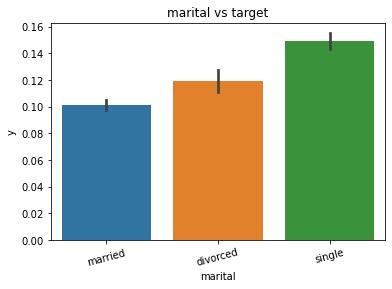

In [36]:
# Marital column vs Target
sns.barplot(x='marital',y='y',data=data,order=data.groupby('marital')['y'].mean().reset_index().sort_values('y')['marital'])
plt.xticks(rotation=15)
plt.title('marital vs target')
plt.show()

FROM MARITIAL VS TARGET ,
We got SINGLE people targeted more to subscribe the insurance more than others.

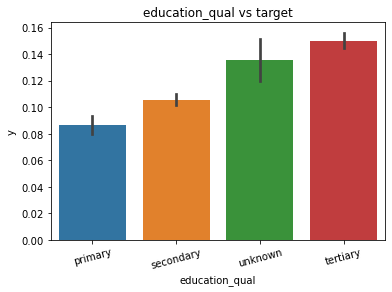

In [37]:
# Educational Qualification vs Target
sns.barplot(x='education_qual',y='y',data=data,order=data.groupby('education_qual')['y'].mean().reset_index().sort_values('y')['education_qual'])
plt.xticks(rotation=15)
plt.title('education_qual vs target')
plt.show()

FROM EQUCATION QUALIFICATION VS TARGET , We got TERTIARY people interested more to subscribe the insurance more than others.

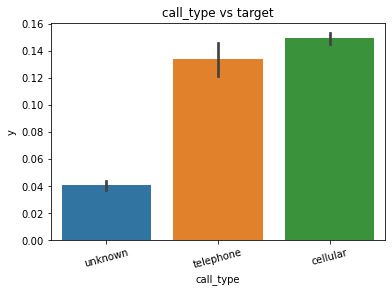

In [38]:
# Call Type vs Target
sns.barplot(x='call_type',y='y',data=data,order=data.groupby('call_type')['y'].mean().reset_index().sort_values('y')['call_type'])
plt.xticks(rotation=15)
plt.title('call_type vs target')
plt.show()

FROM CALL TYPE VS TARGET , We got CELLULAR people interested more to subscribe the insurance more than others.

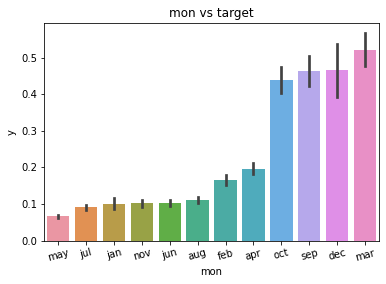

In [39]:
# Month Column vs Target
sns.barplot(x='mon',y='y',data=data,order=data.groupby('mon')['y'].mean().reset_index().sort_values('y')['mon'])
plt.xticks(rotation=15)
plt.title('mon vs target')
plt.show()

FROM MONTH VS TARGET , We got MAR month scored much amount to subscribe the insurance more than others. Because, the trend during the month of MARCH is high, as march being the end of financial year in INDIA and the month of DECEMBER is the second highest one as being the financial year in ABROADS.

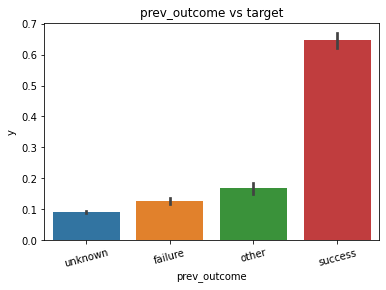

In [40]:
# Previous Outcome vs Target
sns.barplot(x='prev_outcome',y='y',data=data,order=data.groupby('prev_outcome')['y'].mean().reset_index().sort_values('y')['prev_outcome'])
plt.xticks(rotation=15)
plt.title('prev_outcome vs target')
plt.show()

FROM PREVIOUS OUTCOME VS TARGET , We got SUCCESS people interested more to subscribe the insurance more than others.

# ENCODE THE DATA

## LABEL ENCODING

In [41]:
data['job']=data['job'].map({'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'unknown':5,'self-employed':6,'admin.':7,'management':8,'unemployed':9,'retired':10,'student':11})
data['education_qual']=data['education_qual'].map({'primary':0,'secondary':1,'unknown':2,'tertiary':3})
data['call_type']=data['call_type'].map({'unknown':0,'telephone':1,'cellular':2})
data['mon']=data['mon'].map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})

## ONE-HOT ENCODING

In [42]:
data= pd.get_dummies(data, columns=["marital",'prev_outcome'])
data.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,y,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,8,3,0,5,0,261,1,0,0,1,0,0,0,0,1
1,44,4,1,0,5,0,151,1,0,0,0,1,0,0,0,1
2,33,1,1,0,5,0,76,1,0,0,1,0,0,0,0,1
3,47,0,2,0,5,0,92,1,0,0,1,0,0,0,0,1
4,33,5,2,0,5,0,198,1,0,0,0,1,0,0,0,1


# TARGET AND FEATURE SELECTION

In [43]:
X = data[['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']].values
y = data['y'].values

## SPLITTING

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=5)

# SMOTEENN

In [45]:
from imblearn.combine import SMOTEENN 
smt = SMOTEENN(sampling_strategy='all') 
X_train, y_train = smt.fit_resample(X_train, y_train) 

# Models

# 1. Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,f1_score

lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)
y_pred = lr.predict(X_test)
print("Training Accuracy :",lr.score(X_train,y_train))
print("Testing Accuracy :",lr.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.8983781564360501
Testing Accuracy : 0.7621944475168676
F1 Score : 0.45624683864441073
ROC AUC Score : 0.7961326316449395


# 2. Decision Tree 

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
    dt = DecisionTreeClassifier(max_depth=depth) 
    dt.fit(X_train, y_train) 
    trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) 
    dt = DecisionTreeClassifier(max_depth=depth) 
    valAccuracy = cross_val_score(dt, X_train, y_train, cv=10)
    dt = DecisionTreeClassifier(max_depth=depth) 
    dt.fit(X_train,y_train)
    y_pred = dt.predict(X_test)
    roc = roc_auc_score(y_test,y_pred)
    print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy,"ROC AUC Score :", roc, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7833933670517534 ROC AUC Score : 0.7229150174790495  Cross val score :  0.7833933085603361
Depth  :  2  Training Accuracy :  0.8017954125529572 ROC AUC Score : 0.7120369291705498  Cross val score :  0.8017957706477109
Depth  :  3  Training Accuracy :  0.8682368750116646 ROC AUC Score : 0.7557943797557425  Cross val score :  0.8681075940457601
Depth  :  4  Training Accuracy :  0.9082697224762509 ROC AUC Score : 0.7968357586918036  Cross val score :  0.9074309866967905
Depth  :  5  Training Accuracy :  0.9140180287788582 ROC AUC Score : 0.8052432235933483  Cross val score :  0.9109773367405085
Depth  :  6  Training Accuracy :  0.9278288945708367 ROC AUC Score : 0.8230319343543793  Cross val score :  0.923276169325379
Depth  :  7  Training Accuracy :  0.934566357477464 ROC AUC Score : 0.8249620686848045  Cross val score :  0.928408402842396
Depth  :  8  Training Accuracy :  0.9428715402848025 ROC AUC Score : 0.8291768542015219  Cross val score :  0.9373

In [52]:
tree = DecisionTreeClassifier(max_depth=20)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print("Training Accuracy :",tree.score(X_train,y_train))
print("Testing Accuracy :",tree.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.9993094567104011
Testing Accuracy : 0.843601371529698
F1 Score : 0.5137551581843192
ROC AUC Score : 0.779816376409646


## 3. K-NEAREST NEIGHBOUR

In [54]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
  knn= KNeighborsClassifier(i)
  knn.fit(X_train, y_train) 
  print("K value  : " , i, " Train score : ", knn.score(X_train,y_train) , " Cross val score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10))) #predicting using the model

K value  :  1  Train score :  1.0  Cross val score :  0.9948489217031614
K value  :  2  Train score :  0.9998320300106381  Cross val score :  0.9954648092282097
K value  :  3  Train score :  0.9968645601985778  Cross val score :  0.9864130739517082
K value  :  4  Train score :  0.9969765401914857  Cross val score :  0.9879621455006461
K value  :  5  Train score :  0.9907056605886415  Cross val score :  0.9769507690488126
K value  :  6  Train score :  0.9913962038782405  Cross val score :  0.9788544540095081
K value  :  7  Train score :  0.9838002276926523  Cross val score :  0.9672085193867892
K value  :  8  Train score :  0.9846587409716131  Cross val score :  0.970138685877685
K value  :  9  Train score :  0.9755510348817678  Cross val score :  0.9600978626028531
K value  :  10  Train score :  0.9771187547824789  Cross val score :  0.9625800972796024
K value  :  20  Train score :  0.9494596965342192  Cross val score :  0.937608604754234
K value  :  30  Train score :  0.93363319086989

In [56]:
knn = KNeighborsClassifier(5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Training Accuracy :",knn.score(X_train,y_train))
print("Testing Accuracy :",knn.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.9907056605886415
Testing Accuracy : 0.748368543302732
F1 Score : 0.4279607744531053
ROC AUC Score : 0.7677239128929512


## 4. XG_BOOST

In [57]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
for i in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = i, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) #train the model
  model.score(X_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", i, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.9413224837162427  Cross-Val score :  0.9360231496505375
Learning rate :  0.02  Train score :  0.9478733133013568  Cross-Val score :  0.9419581303888809
Learning rate :  0.03  Train score :  0.9536962729325694  Cross-Val score :  0.9478372315315411
Learning rate :  0.04  Train score :  0.9595752225602359  Cross-Val score :  0.9527271053686832
Learning rate :  0.05  Train score :  0.9629906123439279  Cross-Val score :  0.9559560230890518
Learning rate :  0.06  Train score :  0.9657341221701723  Cross-Val score :  0.9582702881241806
Learning rate :  0.07  Train score :  0.9673018420708833  Cross-Val score :  0.9594647810881579
Learning rate :  0.08  Train score :  0.9698587185756145  Cross-Val score :  0.9606033178374982
Learning rate :  0.09  Train score :  0.9710158451689965  Cross-Val score :  0.96146180883
Learning rate :  0.1  Train score :  0.9721356450980758  Cross-Val score :  0.9622643540559045
Learning rate :  0.11  Train score :  0.972863

In [58]:
xg = XGBClassifier(learning_rate = 0.14, n_estimators=100, verbosity = 0)
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)
print("Training Accuracy :",xg.score(X_train,y_train))
print("Testing Accuracy :",xg.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.9771934081110841
Testing Accuracy : 0.8634000663643402
F1 Score : 0.5831927100911238
ROC AUC Score : 0.8382269759373001


## 5. Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_depth=6, max_features='sqrt')
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("Training Accuracy :",rf.score(X_train,y_train))
print("Testing Accuracy :",rf.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.9331666075661148
Testing Accuracy : 0.7933856874239575
F1 Score : 0.5018666666666666
ROC AUC Score : 0.8295544713803957


# Actual vs Prediction

In [61]:
df1 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred}).reset_index()
df1.drop('index',axis=1,inplace=True)
df1

,Actual,Predicted
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
9036,0,0
9037,0,0
9038,0,1
9039,0,0
